In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import CCA
from sklearn.cluster import KMeans

In [3]:

# Load the dataset
df = pd.read_csv('Liver_disease_data.csv')

# Separate continuous and categorical variables
continuous_vars = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']
categorical_vars = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension', 'Diagnosis']

#check missing values 
missing_values_count = df.isnull().sum()
print('Missing Values : \n' ,missing_values_count)

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_vars] = cat_imputer.fit_transform(df[categorical_vars])

# Standardize continuous variables
scaler = StandardScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# One-hot encode categorical variables (if needed for other techniques)
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# For PCA, create a separate DataFrame with only standardized continuous variables
df_pca = df[continuous_vars]


Missing Values : 
 Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64


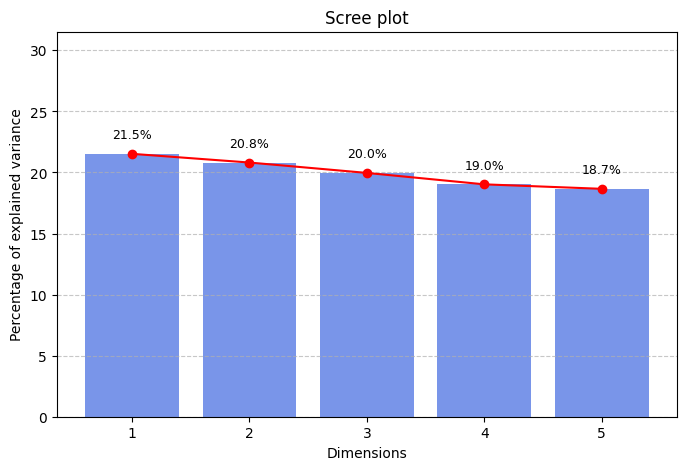

Total variances [21.52787296 20.81501683 19.96455814 19.02957031 18.66298176]



                         PC1       PC2       PC3       PC4       PC5
Age                 0.142532  0.642743  0.528061 -0.270527  0.463177
BMI                 0.589468  0.330854  0.161827  0.442837 -0.566366
AlcoholConsumption -0.511236  0.411125 -0.182574  0.702889  0.205495
PhysicalActivity   -0.032965 -0.533364  0.710716  0.418651  0.184528
LiverFunctionTest   0.608082 -0.154650 -0.395617  0.247768  0.623232


In [5]:
# Principal Component Analysis (PCA)

pca = PCA()
pca.fit(df_pca)

explained_variance = pca.explained_variance_ratio_ * 100 
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='royalblue')
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', color='red', label='Eigenvalues Line')

for i, v in enumerate(explained_variance):
    plt.text(i + 1, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)

plt.xlabel('Dimensions')
plt.ylabel('Percentage of explained variance')
plt.title('Scree plot')
plt.xticks(range(1, len(explained_variance) + 1))
plt.ylim(0, max(explained_variance) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(df_pca.columns))], index=df_pca.columns)
pca_scores = pd.DataFrame(pca.transform(df_pca), columns=[f'PC{i+1}' for i in range(len(df_pca.columns))])
explained_variance, cumulative_variance, loadings.head(), pca_scores.head()
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(df_pca.columns))], index=df_pca.columns)

print('Total variances', explained_variance)
print('\n\n')
print(loadings)

C:\Users\viman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


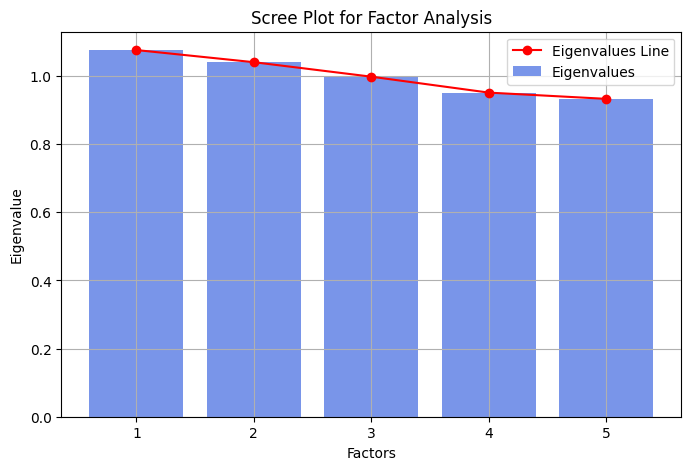

In [6]:
# Factor Analysis (FA)

fa = FactorAnalyzer()
fa.fit(df_pca)
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(ev)+1), ev, alpha=0.7, color='royalblue', label='Eigenvalues')
plt.plot(range(1, len(ev)+1), ev, marker='o', color='red', label='Eigenvalues Line')
plt.title('Scree Plot for Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.legend()
plt.show()


In [7]:

# Select number of factors based on scree plot
n_factors = 2
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_pca)

loadings = pd.DataFrame(fa.loadings_, index=df_pca.columns)
communalities = pd.Series(fa.get_communalities(), index=df_pca.columns)
factor_scores = pd.DataFrame(fa.transform(df_pca), columns=[f'Factor{i+1}' for i in range(n_factors)])
variances = fa.get_factor_variance()

print("Eigenvalues:\n", ev)
print("\nFactor Variances (Variance, Proportion, Cumulative):\n", variances)
print("\nCommunalities:\n", communalities)
print("\nLoadings:\n", loadings)
print("\nFactor Scores (first 5 rows):\n", factor_scores.head())


Eigenvalues:
 [1.07639365 1.04075084 0.99822791 0.95147852 0.93314909]

Factor Variances (Variance, Proportion, Cumulative):
 (array([0.14295838, 0.12204159]), array([0.02859168, 0.02440832]), array([0.02859168, 0.053     ]))

Communalities:
 Age                   0.017850
BMI                   0.139057
AlcoholConsumption    0.068285
PhysicalActivity      0.007840
LiverFunctionTest     0.031969
dtype: float64

Loadings:
                            0         1
Age                -0.013540  0.132915
BMI                 0.224190  0.297986
AlcoholConsumption -0.243357  0.095197
PhysicalActivity    0.037341 -0.080282
LiverFunctionTest   0.178596  0.008477

Factor Scores (first 5 rows):
     Factor1   Factor2
0 -0.237280  0.625066
1  0.384676  0.217144
2 -0.483935 -0.308253
3 -0.382539 -0.532366
4  0.102295 -0.511736


C:\Users\viman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\viman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
# Discriminant Analysis (DA) 

# X: predictors, y: target
X = df_encoded.drop(columns=['Diagnosis_1'])  
y = df_encoded['Diagnosis_1']                

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

coefficients = pd.Series(lda.coef_[0], index=X.columns)
predictions = lda.predict(X)

print("LDA coefficients:\n", coefficients)
print("\nPredicted class labels (first 10):\n", predictions[:10])


LDA coefficients:
 Age                   0.580299
BMI                   0.583626
AlcoholConsumption    1.354197
PhysicalActivity     -0.385585
LiverFunctionTest     1.315218
Gender_1              1.346210
Smoking_1             1.721030
GeneticRisk_1        -0.056998
GeneticRisk_2         2.233406
Diabetes_1            0.891357
Hypertension_1        1.458579
dtype: float64

Predicted class labels (first 10):
 [ True  True False False False  True  True False False  True]


In [14]:
#Canonical Correlation Analysis (CCA)

set1 = ['Age', 'BMI', 'AlcoholConsumption']
set2 = ['PhysicalActivity', 'LiverFunctionTest']

cca = CCA(n_components=2)
X1 = df_pca[set1]
Y1 = df_pca[set2]
cca.fit(X1, Y1)
X_c, Y_c = cca.transform(X1, Y1)

corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(2)]

for i, corr in enumerate(corrs):
    print(f"Canonical correlation {i+1}: {corr:.4f}")

print("\nFirst 5 rows of X_c:\n", X_c[:5])
print("\nFirst 5 rows of Y_c:\n", Y_c[:5])


Canonical correlation 1: 0.0642
Canonical correlation 2: 0.0272

First 5 rows of X_c:
 [[ 0.37821147  1.6881838 ]
 [-0.91512183  0.12348557]
 [ 1.73375526 -0.12788786]
 [ 1.04777931 -1.30931031]
 [ 0.05164612 -1.74295548]]

First 5 rows of Y_c:
 [[ 1.09971663  1.30289712]
 [-0.02368643  1.21331207]
 [-0.59229247 -1.64028615]
 [-0.25244599 -0.16580977]
 [-0.63357274  0.67650959]]
